# **REAL ESTATE RISK PREDICTION**

### **Data Description**

**CRIM**: per capita crime rate by town

**ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS**: proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: nitric oxides concentration (parts per 10 million)

**RM**: average number of rooms per dwelling

**AGE**: proportion of owner-occupied units built prior to 1940

**DIS**: weighted distances to ﬁve Boston employment centers

**RAD**: index of accessibility to radial highways

**TAX**: full-value property-tax rate per $10,000

**PTRATIO**: pupil-teacher ratio by town 12. 

**B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.

**LSTAT**: % lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s

# **FIND MEDV VALUE**

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Load the dataset
df = pd.read_csv('data.csv')

In [14]:
# Check if 'MEDV' column exists
if 'MEDV' not in df.columns:
    print("Error: 'MEDV' column not found. Check your CSV file.")
else:
    print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [15]:
# Display first 5 rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [16]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  506.000000   
mean     3.584139   11.252446   11.151096    0.068493    0.554757    6.287589   
std      8.564433   23.234838    6.828175    0.252838    0.115310    0.703802   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082325    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.629750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean    68.616243    3.783876    9.485323  407.440313   18.500000  356.600900   
std   

In [17]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


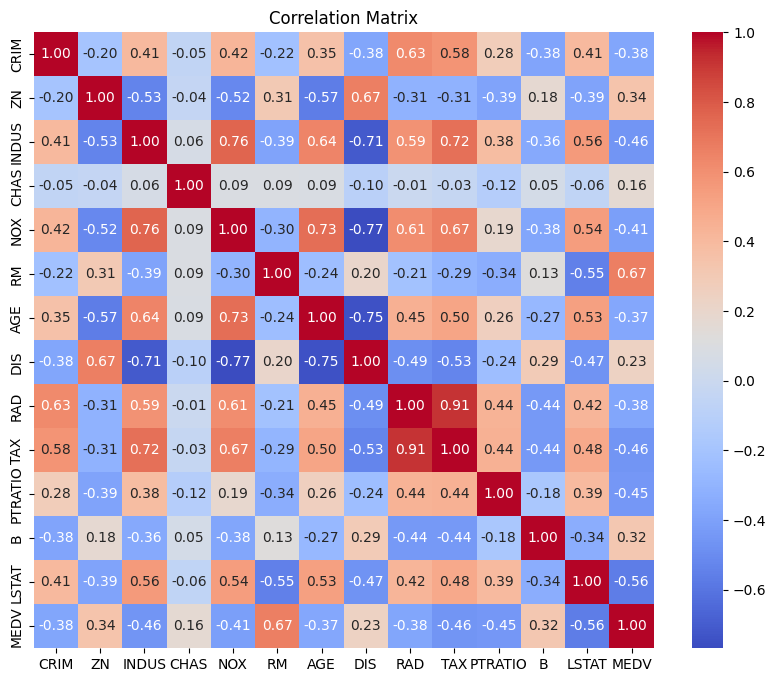

In [18]:
# Correlation matrix (to see which features affect MEDV the most)
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
print("Columns in your CSV file:", df.columns.tolist())

Columns in your CSV file: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 1. Load BOTH datasets
try:
    # Load training data (contains features + MEDV)
    df_true = pd.read_csv('data.csv')  # Replace with your actual training file
    print("Training data loaded. Shape:", df_true.shape)
    
    # Load prediction data (features only)
    df_features = pd.read_csv('data.csv')  
    print("Prediction data loaded. Shape:", df_features.shape)
    
except Exception as e:
    print("Error loading data:", e)
    raise

# 2. Verify MEDV exists in training data
if 'MEDV' not in df_true.columns:
    raise ValueError("Training data must contain 'MEDV' column")

# 3. Train model
X_train = df_true.drop('MEDV', axis=1)
y_train = df_true['MEDV']

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully")

# 4. Check feature compatibility
missing_features = set(X_train.columns) - set(df_features.columns)
if missing_features:
    raise ValueError(f"Prediction data missing features: {missing_features}")

# 5. Make predictions (ensuring same column order)
df_features['MEDV'] = np.round(model.predict(df_features[X_train.columns]), 2)

# 6. Save results
df_features.to_csv('rsp_data.csv', index=False)
print("Predictions saved successfully")

Training data loaded. Shape: (511, 14)
Prediction data loaded. Shape: (511, 14)
Model trained successfully
Predictions saved successfully


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

In [2]:
file_path = "rsp_data.csv"  
df = pd.read_csv(file_path)

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT   MEDV  
0  396.90   4.98  25.04  
1  396.90   9.14  21.78  
2  392.83   4.03  34.78  
3  394.63   2.94  33.36  
4  396.90   5.33  35.42  


In [3]:
# Create Risk Categories
df['RISK'] = pd.qcut(df['MEDV'], q=[0, 0.25, 0.75, 1], labels=['High', 'Moderate', 'Low'])
print(df[['MEDV', 'RISK']].head())

    MEDV      RISK
0  25.04  Moderate
1  21.78  Moderate
2  34.78       Low
3  33.36       Low
4  35.42       Low


In [4]:
#check missing value
print(df.isnull().sum()) 


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
RISK       0
dtype: int64


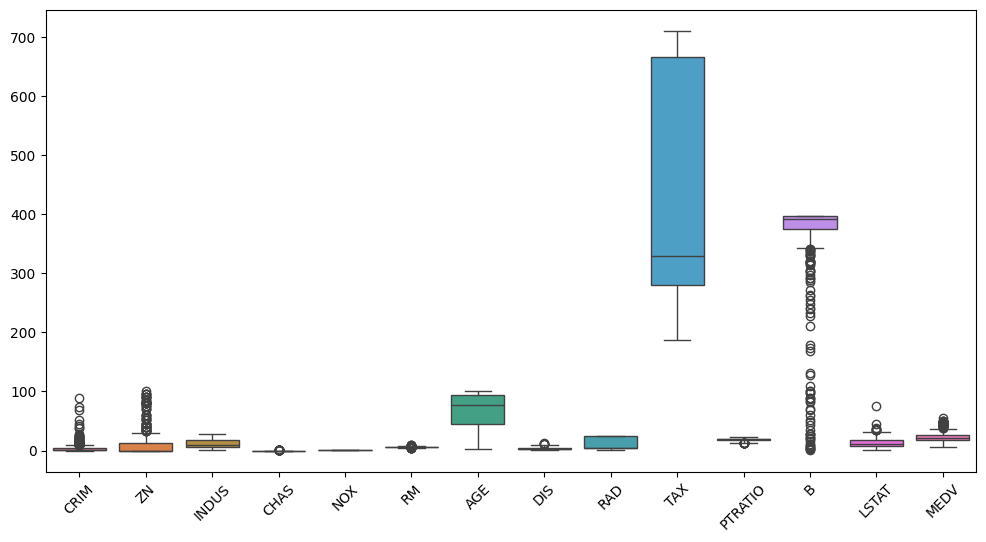

In [5]:
#outlier detection and handling
# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop('RISK', axis=1))
plt.xticks(rotation=45)
plt.show()


In [6]:

# Winsorization (capping outliers)
for col in df.select_dtypes(include=['float64', 'int64']):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [7]:
#feature scaling
scaler = StandardScaler()
X = df.drop('RISK', axis=1)
y = df['RISK']
X_scaled = scaler.fit_transform(X)

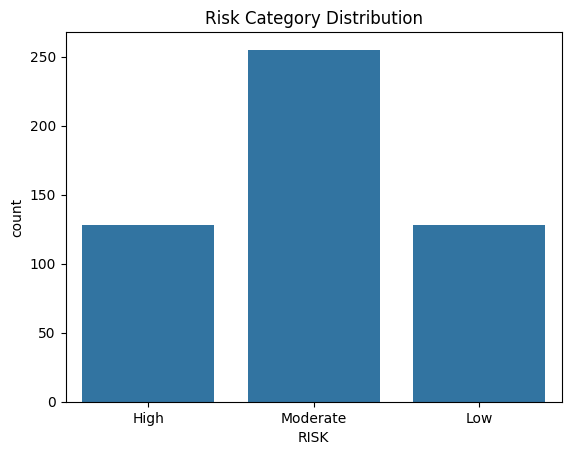

In [8]:
#risk distribution
sns.countplot(x=df['RISK'])
plt.title("Risk Category Distribution")
plt.show()

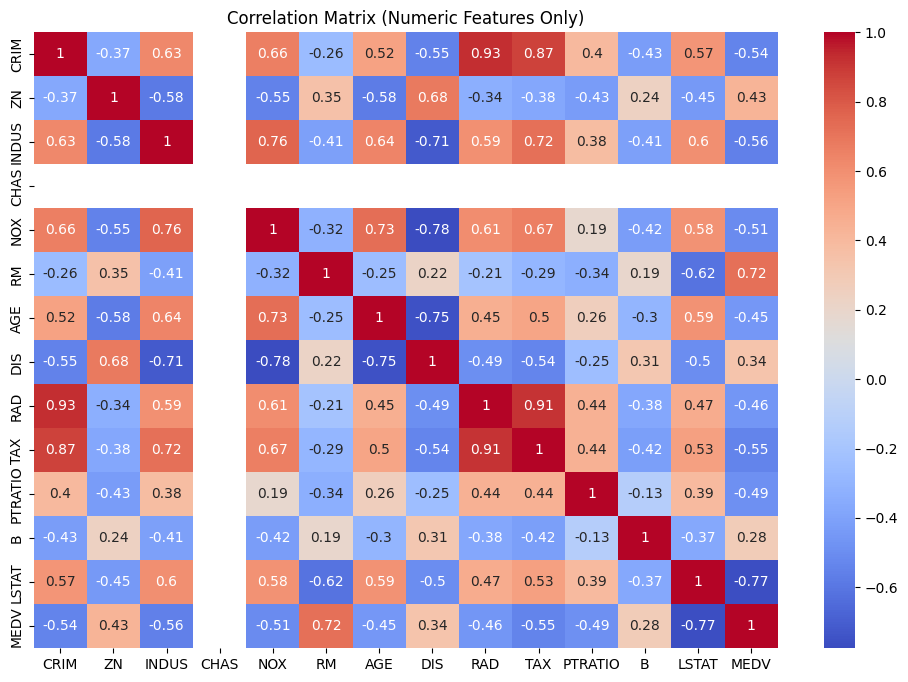

In [9]:
#correlation heatmap
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [10]:
#feature importance
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10]
}

# Create and fit GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)
grid_search.fit(X, y)

# Now you can use best_model
best_model = grid_search.best_estimator_
importance = best_model.feature_importances_

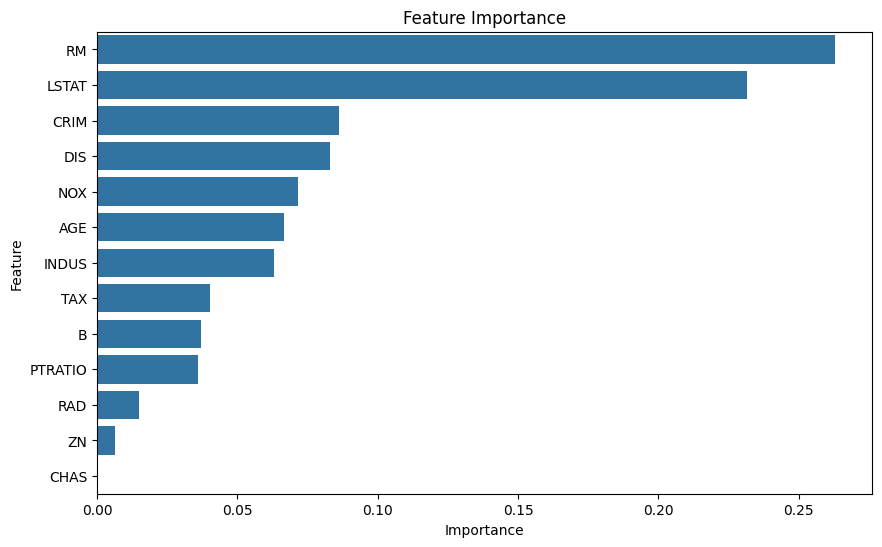

In [11]:


# 2. Prepare features (X) and target (y)
X = df.drop(['MEDV', 'RISK'], axis=1)  # Features
y = df['RISK']                         # Target

# 3. Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 4. Get feature importances
importance = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# 5. Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Feature Importance")
plt.show()

In [12]:
#feature interaction

In [13]:
df['RM_TAX_interaction'] = df['RM'] * df['TAX']  # Rooms vs Tax
df['NOX_DIS_interaction'] = df['NOX'] * df['DIS']  # Pollution vs Distance

In [14]:
#binning continuos variables
df['AGE_binned'] = pd.cut(df['AGE'], bins=3, labels=['New', 'Medium', 'Old'])
df = pd.get_dummies(df, columns=['AGE_binned'], drop_first=True)

In [15]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
#Handling class imbalance(smote)
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


# Impute missing values (recommended)
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = df.drop(['MEDV', 'RISK'], axis=1)
y = df['RISK']
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42
)

#  Apply SMOTE (now that there are no NaN values)
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#  Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

#  Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.89      0.89      0.89        38
         Low       0.79      0.92      0.85        24
    Moderate       0.93      0.89      0.91        92

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.90      0.90      0.90       154



In [17]:
print(pd.DataFrame(X_imputed).isnull().sum())  # Should show 0 NaN values

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64


In [18]:
#model selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# 1. Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 2. Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_smote)
y_test_encoded = le.transform(y_test)

# 3. Updated models dictionary
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=5000)  # Removed multi_class
}

# 4. Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)
    y_pred_encoded = model.predict(X_test_scaled)
    y_pred = le.inverse_transform(y_pred_encoded)
    
    print(f"\n--- {name} ---")
    print("Test classes:", np.unique(y_test))
    print("Pred classes:", np.unique(y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))


--- Random Forest ---
Test classes: ['High' 'Low' 'Moderate']
Pred classes: ['High' 'Low' 'Moderate']
              precision    recall  f1-score   support

        High       0.89      0.87      0.88        38
         Low       0.78      0.88      0.82        24
    Moderate       0.91      0.89      0.90        92

    accuracy                           0.88       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154


--- XGBoost ---
Test classes: ['High' 'Low' 'Moderate']
Pred classes: ['High' 'Low' 'Moderate']
              precision    recall  f1-score   support

        High       0.87      0.89      0.88        38
         Low       0.72      0.88      0.79        24
    Moderate       0.92      0.86      0.89        92

    accuracy                           0.87       154
   macro avg       0.84      0.88      0.85       154
weighted avg       0.88      0.87      0.87       154


--- SVM ---
Test classes: ['High' 'Lo

In [19]:
#hyperparameter tuning(random forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.87      0.89      0.88        38
         Low       0.79      0.92      0.85        24
    Moderate       0.93      0.88      0.91        92

    accuracy                           0.89       154
   macro avg       0.86      0.90      0.88       154
weighted avg       0.89      0.89      0.89       154



In [20]:
#finding best model
print("Best Model (Random Forest):")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC (OvR): {roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), multi_class='ovr'):.2f}")

Best Model (Random Forest):
[[34  0  4]
 [ 0 22  2]
 [ 5  6 81]]
              precision    recall  f1-score   support

        High       0.87      0.89      0.88        38
         Low       0.79      0.92      0.85        24
    Moderate       0.93      0.88      0.91        92

    accuracy                           0.89       154
   macro avg       0.86      0.90      0.88       154
weighted avg       0.89      0.89      0.89       154

Accuracy: 0.89
ROC AUC (OvR): 0.50


In [21]:
#test model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample dataset (replace with actual data)
X = [[0.1, 7.5, 5.0, 0.4, 14.0],  # Example feature set
     [0.8, 6.2, 12.0, 0.5, 18.0],
     [18.0, 4.8, 22.0, 0.7, 20.0]]
y = ["Low", "Moderate", "High"]  # Corresponding risk levels

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier()

# Train model
model.fit(X_train, y_train)


RandomForestClassifier()

In [22]:

# Now you can make predictions
test_case = [[0.5, 6.5, 10.0, 0.5, 18.0]]
predicted_risk = model.predict(test_case)[0]

print(f"Predicted Risk Level: {predicted_risk}")

Predicted Risk Level: Moderate


In [23]:
high_risk_property = {
    'CRIM': 30.0,     # Extremely high crime rate (typical range: 0-100)
    'RM': 4.2,        # Very few rooms (typical range: 3-9)
    'LSTAT': 30.0,    # Very high poverty percentage (typical range: 1-38)
    'NOX': 0.9,       # Extreme pollution (typical range: 0.3-0.9)
    'PTRATIO': 24.0   # Very poor schools (typical range: 12-22)
}

# Prepare features in correct order
features = [[
    high_risk_property['CRIM'],
    high_risk_property['RM'],
    high_risk_property['LSTAT'],
    high_risk_property['NOX'],
    high_risk_property['PTRATIO']
]]

# Get prediction
risk = model.predict(features)[0]
proba = model.predict_proba(features)[0]

# Display results
print("HIGH-RISK PROPERTY TEST CASE")
print("----------------------------")
print(f"CRIM: {high_risk_property['CRIM']} (Per capita crime rate)")
print(f"RM: {high_risk_property['RM']} (Average number of rooms)")
print(f"LSTAT: {high_risk_property['LSTAT']} (% lower status population)")
print(f"NOX: {high_risk_property['NOX']} (Nitric oxides concentration)")
print(f"PTRATIO: {high_risk_property['PTRATIO']} (Pupil-teacher ratio)")
print("\nMODEL PREDICTION:")
print(f"Risk Level: {risk}")
print(f"Confidence: {max(proba):.1%}")
print("\nPROBABILITY BREAKDOWN:")
for class_name, prob in zip(model.classes_, proba):
    print(f"- {class_name}: {prob:.1%}")

# Risk interpretation
if risk == 'High' and proba[0] > 0.9:
    print("\nRISK ALERT: This property exhibits all classic high-risk characteristics")
    print("Recommended Actions:")
    print("1. Verify crime reports in the area")
    print("2. Inspect property condition (low room count suggests poor maintenance)")
    print("3. Check environmental hazard reports")
    print("4. Strongly consider avoiding investment")
elif risk == 'High':
    print("\nWARNING: High risk detected, but with moderate confidence")
    print("Recommended: Conduct thorough on-site inspection")

HIGH-RISK PROPERTY TEST CASE
----------------------------
CRIM: 30.0 (Per capita crime rate)
RM: 4.2 (Average number of rooms)
LSTAT: 30.0 (% lower status population)
NOX: 0.9 (Nitric oxides concentration)
PTRATIO: 24.0 (Pupil-teacher ratio)

MODEL PREDICTION:
Risk Level: High
Confidence: 82.0%

PROBABILITY BREAKDOWN:
- High: 82.0%
- Moderate: 18.0%

Recommended: Conduct thorough on-site inspection
